<a href="https://colab.research.google.com/github/banshee0716/Financial-Big-Data-Analysis/blob/master/%E9%87%91%E8%9E%8D%E6%95%B8%E6%93%9A%E5%88%86%E6%9E%90W7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 導入所需的套件
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
# 設定隨機種子以確保結果可重現
np.random.seed(42)
tf.random.set_seed(42)

# 下載股票資料
def download_stock_data(ticker="2330.TW", start="2020-01-01", end="2023-01-01"):
    df = yf.download(ticker, start=start, end=end)
    return df['Close'].values.reshape(-1, 1)

# 創建訓練資料
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

# 建立模型
def create_model(seq_length):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(seq_length,)),  # 修改input_shape
        Dropout(0.1),
        Dense(32, activation='relu'),
        Dropout(0.1),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# 主要執行流程
def main():
    # 參數設定
    seq_length = 60  # 使用過去60天的資料來預測
    train_split = 0.8

    # 下載資料
    data = download_stock_data()

    # 資料正規化
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)

    # 創建序列資料
    X, y = create_sequences(scaled_data, seq_length)

    # 分割訓練集和測試集
    train_size = int(len(X) * train_split)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # 建立及訓練模型
    model = create_model(seq_length)
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_split=0.1,
        verbose=1
    )

    # 預測
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    # 反正規化 - 修正維度問題
    train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
    test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))

    # 準備實際值的時間軸
    train_dates = range(seq_length, seq_length + len(train_predict))
    test_dates = range(seq_length + train_size, seq_length + train_size + len(test_predict))

    # 繪製結果
    plt.figure(figsize=(15, 7))
    plt.plot(data[:train_size+seq_length], label='Training Data (True Price)', color='blue')
    plt.plot(range(seq_length+train_size, len(data)), data[seq_length+train_size:],
             label='Test Data (True Price)', color='orange')
    plt.plot(train_dates, train_predict,
             label='Predicted Price', color='green', alpha=0.7)
    plt.plot(test_dates, test_predict, color='green', alpha=0.7)

    plt.title('2330.TW Stock Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.6022 - val_loss: 0.0582
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0599 - val_loss: 0.0072
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0346 - val_loss: 0.0123
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0304 - val_loss: 0.0026
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0215 - val_loss: 0.0095
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0226 - val_loss: 0.0016
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0173 - val_loss: 0.0011
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0157 - val_loss: 0.0021
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0145 - val_loss: 0.0025
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0141 - val_loss: 0.0025
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0108 - val_loss: 7.8865e-04
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0128 

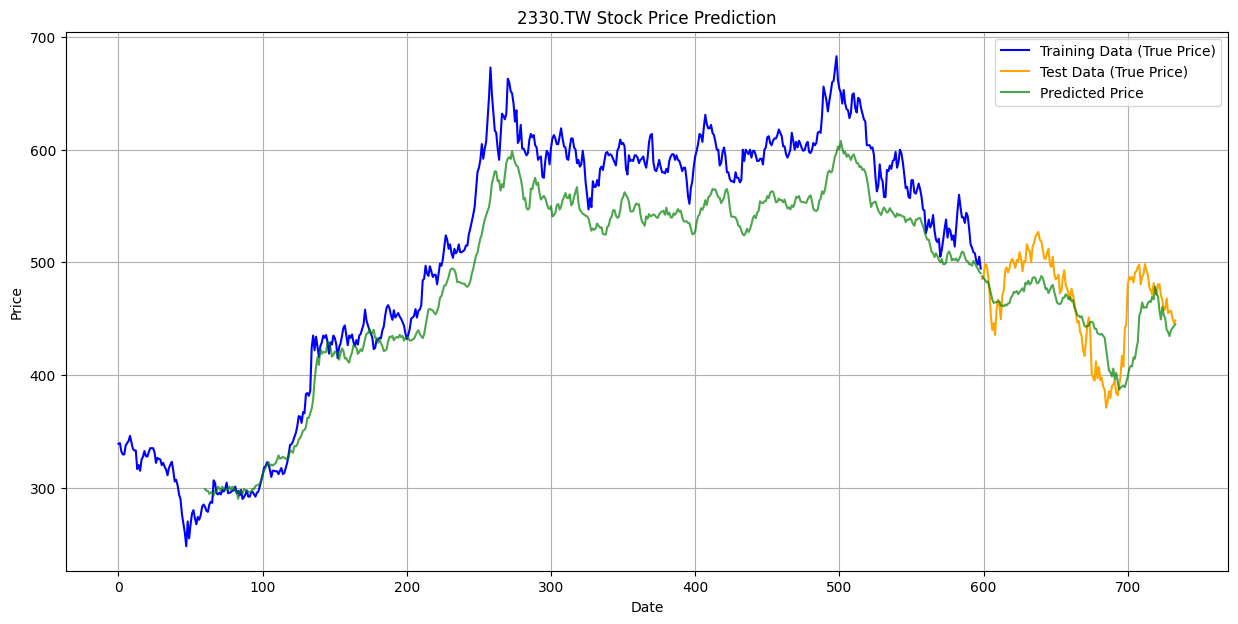

In [3]:
if __name__ == "__main__":
    main()